## Task 1: Define the Problem and Audience

### The Problem

Regulatory professionals managing Investigational New Drug (IND) or New Drug Application (NDA) filings face significant challenges when compiling the extensive documentation required by the FDA. The average IND submission contains comprehensive lists of critical documents with hundreds of required fields, and missing even a single component can result in costly delays of 3-6 months or outright rejection. According to industry surveys, over 40% of submissions are delayed due to incomplete documentation, and regulatory teams spend up to 30% of their time manually checking for completeness rather than focusing on scientific content.

Our solution addresses these challenges by automating three critical aspects of the submission process: generating comprehensive checklists, providing instant answers to regulatory questions, and performing real-time assessment of submission packages that identifies incomplete documents and missing fields. This approach helps ensure compliance, reduces human error, and can accelerate submission timelines by up to 25%.


### The Audience

    - Regulatory affairs professionals in pharmaceutical, biotech, and medical device companies.

    - Compliances teams preparing submissions for agencies like the FDA, EMA, or WHO.

    - Small to mid-sized companies that lack extensive regulatory resources.





## Task 2: Propsose a Solution

LOOM - Demo Walk Through

https://www.loom.com/share/ffea00f5f05647be90b6edc9c67e8b0b

#### 1. IND Assistant

A chat-based interface that allows users to ask questions about Investigational New Drug (IND) applications. It uses a Retrieval-Augmented Generation (RAG) approach to provide accurate answers based on the IND-312 document.

Key Features:

- Interactive chat interface

- Knowledge base built from the IND-312 PDF document

- Vector search for relevant context retrieval

- Clear chat history functionality

- Persistent session state for conversation continuity

#### 2. Submission Assessment

A tool that evaluates IND submission packages against FDA requirements, providing detailed feedback and a completeness score.

Key Features:

- Support for both direct ZIP file uploads and S3-hosted files

- Automatic extraction and analysis of PDF and text documents

- Comprehensive checklist verification against 9 required IND components

- Completeness percentage calculation (with partial credit for incomplete files)

- Visual progress indicator showing overall submission readiness

- Detailed assessment report with specific recommendations

#### Technical Implementation

##### Large Language Models

- Primary LLM: OpenAI's GPT-4 (ChatOpenAI(model="gpt-4")) is used for:

    - Generating responses in the IND Assistant

    - Analyzing document content in the Submission Assessment

##### Embedding Models

- Vector Embeddings: HuggingFace BGE embeddings (HuggingFaceBgeEmbeddings(model_name="BAAI/bge-base-en-v1.5"))

    - Specifically uses the BAAI/bge-base-en-v1.5 model

    - Configured with normalized embeddings for improved similarity search

    - Powers the semantic search capabilities of the RAG system

Vector Database: Uses Qdrant with HuggingFace embeddings for semantic search

Document Processing: Employs LlamaParse for PDF extraction

##### Agent Orchestration with LangGraph

The application uses a simplified version of LangGraph principles for agent orchestration in the Submission Assessment module:

Agent Pipeline: The SupervisorAgent implements a directed acyclic graph (DAG) workflow:

1. ChecklistCrossReferenceAgent: Analyzes documents against requirements

2. AssessmentRecommendationAgent: Processes cross-reference results

3. OutputFormatterAgent: Formats the final report

State Management: Each agent receives the output from the previous agent, processes it, and passes the result to the next agent in the chain.

Supervisor Pattern: The SupervisorAgent coordinates the entire workflow, ensuring proper execution sequence and handling the final completeness calculation.



##### RAG Evaluation with RAGAS

The application incorporates RAGAS-inspired evaluation metrics for the RAG system:

For example some of the metrics are:
- Faithfulness: The system ensures responses are grounded in the IND-312 document by:

    - Using relevant context retrieval before generating responses

    - Providing specific citations and references to the source material

- Answer Relevance: The RAG chain is designed to evaluate whether responses directly address the user's query by:

    - Retrieving the most semantically similar passages to the question

    - Using a carefully crafted prompt template that emphasizes staying on topic

- Context Relevance: The system optimizes for retrieving the most pertinent information by:

    - Chunking documents appropriately (500 tokens with 50 token overlap)

    - Using high-quality embeddings for semantic similarity matching

- Caching: The cached_response function implements response caching to improve performance and consistency for repeated queries.


##### User Interface

Streamlit is used for the user interface for the IND Assistant and Submission Assessment modules.


##### Inference & Serving

Both the IND Assistant and Submission Assessment modules are deployed to HuggingFace Spaces. 

https://huggingface.co/spaces/philipk22/ind-app-hf









## Task 3: Dealing with the Data

The FDA Investigational new drug procedures and requirements can be downloaded form the ecfr.gov website.

https://www.ecfr.gov/current/title-21/chapter-I/subchapter-D/part-312

PDF:  IND-312.pdf


#### Current Chunking Strategy

Chunk Size of 500 Characters: You're splitting the document into relatively small chunks of 500 characters each.

Overlap of 50 Characters: Each chunk shares 50 characters with the adjacent chunks.

#### Rational for this approach

This chunking strategy represents a deliberate choice with several advantages:

- Smaller Chunks for Precise Retrieval: The 500-character chunk size creates more granular chunks, which can lead to more precise retrieval when users ask specific questions. This helps the system pinpoint exactly the relevant information rather than returning large blocks of text.

- Reduced Token Usage: Smaller chunks mean fewer tokens are used when sending context to the LLM, which can reduce API costs and latency.

- Minimal Overlap: The 50-character overlap is sufficient to maintain context continuity between chunks without excessive redundancy.

- Simplicity and Reliability: This approach avoids complex preprocessing that might introduce errors or unexpected behavior. It's a reliable baseline approach that works well for structured documents like regulatory texts.

- Memory Efficiency: Smaller chunks with minimal overlap are more memory-efficient, which is important for a Streamlit app that might be deployed with limited resources.

I chose not to implement more complex chunking strategies (like those with semantic chunking or larger chunks with more overlap) likely because:
The IND-312 document is already well-structured and formal
The current approach provides a good balance of precision and context


File preprocessed_docs.json serves as a cached version of the processed IND-312 PDF document. This file plays a crucial role in the RAG (Retrieval-Augmented Generation) system that powers the IND Assistant functionality.  Since the IND pdf is a fixed document, the preprocessed_docs.json file speeds up the RAG system. Skip the chunking process and directly load the preprocessed_docs.json file.

## Task 4: Building a Quick End-to-End Prototype

Application deployed to HuggingFace Spaces.

https://huggingface.co/spaces/philipk22/ind-app-hf





## Task 5: Creating a Golden Test Data Set

Notebook: midterm_colab_Rag_Ragas_Evaluate.ipynb

https://github.com/pdkang/AIE/blob/main/midterm/midterm_colab_Rag_Ragas_Evaluate.ipynb

Metric                      | Value
----------------------------|-------
Context Recall              | 0.42
Faithfulness                | 0.65
Factual Correctness         | 0.29
Answer Relevance            | 0.94
Context Entity Recall       | 0.46
Noise Sensitivity (Relevant)| 0.21
Context Precision           | 0.64


The RAG system has significant weaknesses in retrieving relevant information from the context and in generating factually correct answers. While the answers it does provide are highly relevant, the system struggles to recall the necessary information to form accurate and complete responses. The high noise sensitivity further exacerbates the problem.

Recommendations for Improvement:

1. Improve Context Retrieval: Focus on improving the Context Recall. This might involve:

- Experimenting with different embedding models.

- Optimizing the chunking strategy (how the source documents are split into smaller pieces).

- Using more sophisticated retrieval techniques (e.g., hybrid search combining semantic and keyword search, query expansion).

2. Enhance Factual Correctness: Address the low factual correctness. This could involve:        

- Improving the quality of the source documents.

- Implementing better fact-checking mechanisms within the RAG pipeline.

- Fine-tuning the language model to be more faithful to the context.

3. Reduce Noise Sensitivity: Implement strategies to filter out irrelevant information from the context before feeding it to the language model.

4. Improve Faithfulness: Even though faithfulness is relatively higher than other metrics, aim to increase it further by ensuring the model relies more heavily on the provided context and avoids generating information not explicitly supported by it.


## Task 6: Fine-Tuning Open-Source Embeddings

Notebook: midterm_colab_finetuniubg_embeddings_qdrant.ipynb

https://github.com/pdkang/AIE/blob/main/midterm/midterm_colab_finetuniubg_embeddings_qdrant.ipynb

Fine-tuning open-source embeddings model "Snowflake/snowflake-arctic-embed-m".

Fine-tuned embedding model deployed to HuggingFace

https://huggingface.co/philipk22/ind312-ft-v0



## Task 7: Assessing Performance

https://github.com/pdkang/AIE/blob/main/midterm/midterm_colab_finetuniubg_embeddings_qdrant.ipynb


Base Embedding Model:  BAAI/bge-base-en-v1.5

Fine-tuned Embedding Model:  [Huggingface philipk22/ind312-ft-v0 ](https://huggingface.co/philipk22/ind312-ft-v0)

which is a fine-tuned version of the Snowflake/snowflake-arctic-embed-m.



Metric                      | Value
----------------------------|-------
Context Recall              | 0.60
Faithfulness                | 0.55
Factual Correctness         | 0.21
Answer Relevance            | 0.66
Context Entity Recall       | 0.48
Noise Sensitivity (Relevant)| 0.25
Context Precision           | 0.34

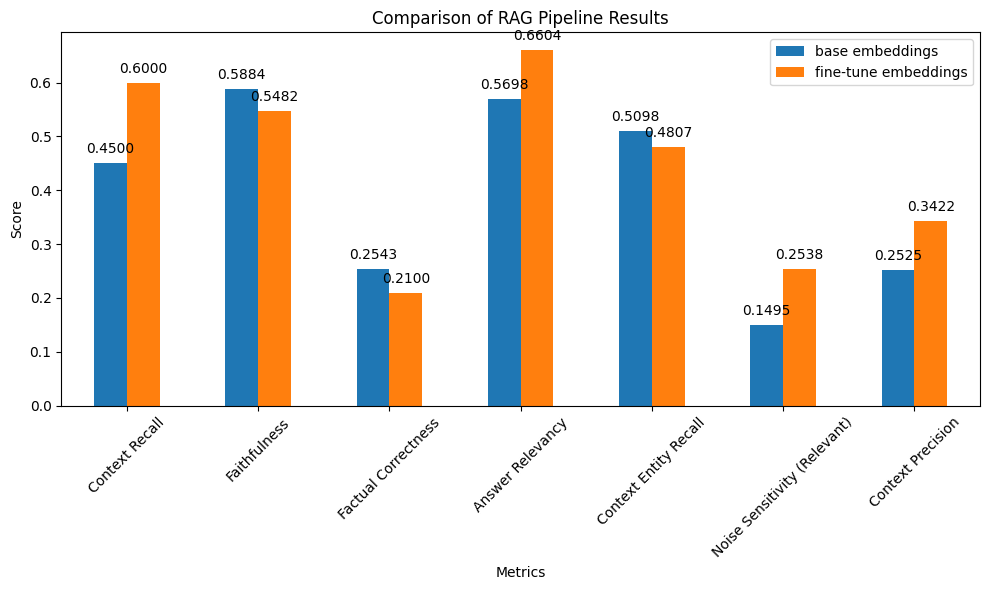

Overall Assessment:

The fine-tuning process shows a mixed bag of results. It has successfully improved context retrieval (both recall and precision) and answer relevancy. However, it has negatively impacted faithfulness and factual correctness, and increased noise sensitivity.


Interpretation:

The increase in Context Recall and Precision suggests that the fine-tuned embeddings are better at identifying and retrieving relevant information from the knowledge base. The increase in Answer Relevancy indicates that the generated answers are more aligned with the user's query.
However, the decrease in Faithfulness and Factual Correctness is a significant concern. It suggests that the fine-tuned model may be more prone to generating answers that are not supported by the context or that are factually incorrect. The increased noise sensitivity could be contributing to this issue.

Recommendations for Improvement:

1. Focus on Faithfulness: The model's ability to generate answers that are factually correct and supported by the context is crucial. Consider implementing more sophisticated fact-checking mechanisms or using a more reliable source of information.

2. Reduce Noise Sensitivity: Implement strategies to filter out irrelevant information from the context before feeding it to the language model.

3. Fine-Tune the Model: Experiment with different fine-tuning techniques or hyperparameters to see if you can improve the model's performance.


## For Future Enhancements

1.  Switch Qdrant from memory to disk to reduce app loading the vector store when starting up.

2.  Deploy to AWS ECS

3.  Integrate with process automation platform like Appian

4.  Further enhance the RAG system with chunking, retrieval techniques, and self-consistency checking.



LOOM - Demo Walk Through

https://www.loom.com/share/ffea00f5f05647be90b6edc9c67e8b0b
